# **CSE 435/535 Project 2 Recitation**



## Preprocessing examples
###Example 1###

**Doc id**: 38604	

**Doc text**: Management of ophthalmic perioperative period during 2019 novel coronavirus disease outbreak/ 新型冠状病毒肺炎疫情下眼科患者围手术期管理实践

**Doc tokens**: ['manag', 'ophthalm', 'periop', 'period', '2019', 'novel', 'coronaviru', 'diseas', 'outbreak']



###Example 2###
**Doc id**: 8413	

**Doc text**: "Tomar o no tomar «decisiones en caliente¼ respecto al tratamiento de la infección por SARS-CoV-2./ [Whether to make decisions ""on the fly"" regarding treatment for SARS-CoV-2 infection]"

**Doc tokens**: ['tomar', 'tomar', 'decision', 'en', 'calient', 'respecto', 'al', 'tratamiento', 'de', 'la', 'infecci', 'n', 'por', 'sar', 'cov', '2', 'whether', 'make', 'decis', 'fli', 'regard', 'treatment', 'sar', 'cov', '2', 'infect']



###Example 3###
**Doc id**: 55745	

**Doc text**: "Aufgaben und Funktion der Ständigen Arbeitsgemeinschaft der Kompetenz- und Behandlungszentren für hochkontagiöse, lebensbedrohliche Erkrankungen"

**Doc tokens**: ['aufgaben', 'und', 'funktion', 'der', 'st', 'ndigen', 'arbeitsgemeinschaft', 'der', 'kompetenz', 'und', 'behandlungszentren', 'f', 'r', 'hochkontagi', 'se', 'lebensbedrohlich', 'erkrankungen']


# Linked Lists for creating Postings lists in Python 3

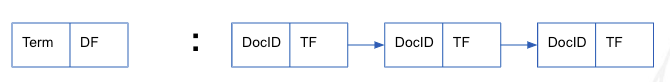

### Why bother with linked lists?

1. **Efficiency**: Faster inserts. Contigious memory not required. 
2. **Control**: Each node in the linked list can be a complex data structure. Nested linked lists.
3. **Learning**: Desired from a learning point of view, where you can get a feel of the considerations to keep in mind, and the bottlenecks while creating postings lists.

Reference:https://www.quora.com/What-is-the-purpose-of-using-a-linked-list-in-Python

### Linked List Demonstration

In [102]:
# The data structure for every element in the linked list. 
class Node:
    def __init__(self, value = None, next = None):
        self.value = value
        self.next = next

In [103]:
#The linked list
class LinkedList:

    def __init__(self):
        self.start_node = None # Head pointer
        self.end_node = None # Tail pointer

    # Method to traverse a created linked list
    def traverse_list(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            while n is not None:
                traversal.append(n.value)
                n = n.next
            return traversal

    # Method to insert elements in the linked list
    def insert_at_end(self, value):
        new_node = Node(value=value)
        n = self.start_node

        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return

        elif self.start_node.value >= value:
            self.start_node = new_node
            self.start_node.next = n
            return

        elif self.end_node.value <= value:
            self.end_node.next = new_node
            self.end_node = new_node
            return

        else:
            while n.value < value < self.end_node.value and n.next is not None:
                n = n.next

            m = self.start_node
            while m.next != n and m.next is not None:
                m = m.next
            m.next = new_node
            new_node.next = n
            return


### Linked list of integers

In [91]:
linked_list = LinkedList() #Initialize
print(linked_list)

In [92]:
#The list is empty
linked_list.traverse_list()

List has no element


In [104]:
#Insert one integer in the list
linked_list.insert_at_end(7)
linked_list.traverse_list()

[7, 7, 7, 7]

In [105]:
l = linked_list.traverse_list()

In [109]:
l.count(0)

0

In [44]:
#Note how start_node & end_node have same memory location
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7fcfce8e6630>, <__main__.Node at 0x7fcfce8e6198>)

In [32]:
#Let's insert a few more elements
[linked_list.insert_at_end(i) for i in [42, 111, 13, 29, 7, -11]]

[None, None, None, None, None, None]

In [85]:
#Already sorted!
linked_list.traverse_list()

[-11, 7, 7, 7, 7, 13, 29, 33, 42, 111]

In [34]:
#Note how start_node & end_node refer to different locations now
linked_list.start_node, linked_list.end_node

(<__main__.Node at 0x7fcfce8e6630>, <__main__.Node at 0x7fcfce8e6198>)

### Linked list with additional data

In [1]:
class Node:
    def __init__(self, value=None, next=None, name=None, age=None, doc=None):
        self.value = value
        self.next = next
        self.name = name
        self.age = age
        self.doc=doc

In [7]:
from collections import OrderedDict
#The linked list
class LinkedList:

    def __init__(self):
        self.start_node = None # Head pointer
        self.end_node = None # Tail pointer
        self.n_students = 0

    # Method to traverse a created linked list
    def traverse_list(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            while n is not None:
                traversal.append([n.doc, n.value])
                n = n.next
            return traversal
    
    # Method to traverse a created linked list
    def traverse_list_extra(self):
        traversal = []
        if self.start_node is None:
            print("List has no element")
            return
        else:
            n = self.start_node
            # Start traversal from head, and go on till you reach None
            cnt = 1
            while n is not None:
                traversal.append(n.doc)
                cnt += 1
                n = n.next
            return traversal

    # Method to insert elements in the linked list
    def insert_at_end(self, params):
        value, name, age = params
        new_node = Node(value=value, name=name, age=age)
        self.n_students += 1
        n = self.start_node

        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return

        elif self.start_node.value <= value:
            self.start_node = new_node
            self.start_node.next = n
            return

        elif self.end_node.value >= value:
            self.end_node.next = new_node
            self.end_node = new_node
            return

        else:
            while n.value > value > self.end_node.value and n.next is not None:
                n = n.next

            m = self.start_node
            while m.next != n and m.next is not None:
                m = m.next
            m.next = new_node
            new_node.next = n
            return
        
    def insert_at_end_tfidf(self, params):
        value, doc = params
        new_node = Node(value=value, doc=doc)
        n = self.start_node

        if self.start_node is None:
            self.start_node = new_node
            self.end_node = new_node
            return

        elif self.start_node.value <= value:
            self.start_node = new_node
            self.start_node.next = n
            return

        elif self.end_node.value >= value:
            self.end_node.next = new_node
            self.end_node = new_node
            return

        else:
            while n.value > value > self.end_node.value and n.next is not None:
                n = n.next

            m = self.start_node
            while m.next != n and m.next is not None:
                m = m.next
            m.next = new_node
            new_node.next = n
            return


In [8]:
linked_list2 = LinkedList()

#Student -> ID, name, age
student1 = [100, 3]
student2 = [100, 2]
student3 = [55, 1]
student4 = [82, 5]
student5 = [75, 6]

In [9]:
#Let's insert the elements
[linked_list2.insert_at_end_tfidf(i) for i in [student1, student2, student3, student4, student5]]

[None, None, None, None, None]

In [10]:
#Already sorted by id
linked_list2.traverse_list()

[[2, 100], [3, 100], [5, 82], [6, 75], [1, 55]]

In [6]:
linked_list2.traverse_list_extra()

[2, 3, 5, 6, 1]

In [41]:
linked_list2.traverse_list_extra()

"OrderedDict([('id', 55), ('name', 'Bob'), ('age', 21)])\n\t->OrderedDict([('id', 75), ('name', 'Keith'), ('age', 22)])\n\t\t->OrderedDict([('id', 82), ('name', 'Kenny'), ('age', 23)])\n\t\t\t->OrderedDict([('id', 99), ('name', 'Alice'), ('age', 26)])\n\t\t\t\t->OrderedDict([('id', 100), ('name', 'Max'), ('age', 22)])\n\t\t\t\t\t"

In [45]:
d = OrderedDict({})

In [56]:
d['a'] = 1

In [96]:
d['b'] = dict()

In [100]:
d['b']['c']=4

In [101]:
d

OrderedDict([('k', 3), ('a', 1), ('b', {'a': 5, 'c': 4})])

In [110]:
for _ in d:
    print(_)

k
a
b


In [41]:
myiter = iter(range(0, 10))

In [56]:
def _merge(l1, l2):
    """ Implement the merge algorithm to merge 2 postings list at a time.
        Use appropriate parameters & return types.
        While merging 2 postings list, preserve the maximum tf-idf value of a document.
        To be implemented."""
    comp_ = 0
    count_1 = 0
    count_2 = 0
    merged_list = list()

    while count_1 < len(l1) and count_2 < len(l2):
        if l1[count_1] == l2[count_2]:
            comp_ = comp_ + 1
            merged_list.append(l1[count_1])
            count_1 = count_1 + 1
            count_2 = count_2 + 1
        elif l1[count_1] < l2[count_2]:
            comp_ = comp_ + 1
            count_1 = count_1 + 1
        else:
            comp_ = comp_ + 1
            count_2 = count_2 + 1

    return merged_list, comp_

In [66]:
l1 = [1,5]
l2=[7,9]

In [67]:
_merge(l2, l1)

([], 2)

In [68]:
t = False

In [70]:
if t:
    print('hey')

In [12]:
max([1,2, 4])

4

In [17]:
l1 = [5,7,4,8]
l2=l1.copy()

In [20]:
l1.sort(reverse=True)

In [21]:
l1

[8, 7, 5, 4]

In [24]:
l2.index(4)

2

In [4]:
k = ['a', 'b', 'c', 'd', 'b']
for _ in k:
    if _ not in list(d.keys()):
        d[_] = _
        print(d)

In [5]:
from collections import OrderedDict

In [6]:
d = OrderedDict({'a': 'c'})

In [8]:
sorted(d.keys())

['a']

In [1]:
for _ in []:
    print(_)

In [11]:
a1 = {1:1, 2:13, 6:4, 3:4, 4:2, 5:30}
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)

In [12]:
a1

{1: 1, 2: 13, 6: 4, 3: 4, 4: 2, 5: 30}

In [13]:
a1_sorted_keys

[5, 2, 6, 3, 4, 1]

In [14]:
sorted(a1.keys())

[1, 2, 3, 4, 5, 6]

In [15]:
max([])

ValueError: max() arg is an empty sequence

In [21]:
def _merge(l1, l2, skip1, skip2):
    """ Implement the merge algorithm to merge 2 postings list at a time.
        Use appropriate parameters & return types.
        While merging 2 postings list, preserve the maximum tf-idf value of a document.
        To be implemented."""
    comp_ = 0
    count_1 = 0
    count_2 = 0
    merged_list = list()

    while count_1 < len(l1) and count_2 < len(l2):
        if l1[count_1] == l2[count_2]:
            comp_ = comp_ + 1
            merged_list.append(l1[count_1])
            count_1 = count_1 + 1
            count_2 = count_2 + 1
        elif l1[count_1] < l2[count_2]:
            comp_ = comp_ + 1
            count_1 = count_1 + 1 + skip1
            if count_1 >= len(l1):
                count_1 = count_1 - skip1
            else:
                if l1[count_1] > l2[count_2]:
                    count_1 = count_1 - skip1
        else:
            comp_ = comp_ + 1
            count_2 = count_2 + 1 + skip2
            if count_2 >= len(l2):
                count_2 = count_2 - skip2
            else:
                if l2[count_2] > l1[count_1]:
                    count_2 = count_2 - skip2

    return merged_list, comp_

In [24]:
l1 = [1,2,5,9]
l2 = [7,8,9]
skip1 = 1
skip2 = 1

In [25]:
_merge(l1, l2, skip1, skip2)

([9], 4)

In [35]:
import pickle

a = {'ip': '3.12.132.75', 'port': '9999', 'name': 'execute_query'}

with open('project2_index_details.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
import requests
import pickle

payload = pickle.load(open("project2_index_details.pickle", "rb"))
res = requests.post("http://3.82.161.49:9998/grade_index", json=payload, timeout=600)
res = res.json()
print(res)

{'Response': {'daatAnd': {'errors': [], 'score': 3.0}, 'daatAndSkip': {'errors': [{'check_daatAndSkip_is hydroxychloroquine effective?': 'Number of comparisons not in desired range i.e. +- 5%'}], 'score': 3.5}, 'daatAndSkipTfIdf': {'errors': [{'check_daatAndSkipTfIdf_is hydroxychloroquine effective?': 'Number of comparisons not in desired range i.e. +- 5%'}], 'score': 1.25}, 'daatAndTfIdf': {'errors': [], 'score': 1.5}, 'postingsList': {'errors': [], 'score': 1.5}, 'postingsListSkip': {'errors': [{'check_postingsListSkip_from an epidemic to a pandemic': 'PL not matching'}, {'check_postingsListSkip_is hydroxychloroquine effective?': 'PL not matching'}], 'score': 1}, 'time_taken': '0.06081557273864746', 'total_score': 11.75}}


In [37]:
with open('project2_index_details.pickle', 'rb') as f:
    b = pickle.load(f)

In [39]:
b

{'ip': '3.12.132.75', 'port': '9999', 'name': 'execute_query'}